CNN MODEL



In [ ]:


import pandas as pd
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras.models import Sequential
from keras.layers import MaxPool2D
import os
from PIL import Image

In [ ]:
train="train"
test="test"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#storing the path in the list
y_train=[]
x_train=[]
for i in os.listdir(train):
    for j in os.listdir(os.path.join(train,i)):
        y_train.append(i)
        x_train.append(os.path.join(train,i,j))

In [ ]:
import os

path = "/content/drive/MyDrive/Flatfield"

if os.path.exists(path):
    print(" Path exists!")
else:
    print(" Path not found. Double-check the folder name or location.")


 Path exists!


In [ ]:
import os

# Base folder containing all subfolders like Canon120-1, Canon120-2, etc.
train = "/content/drive/MyDrive/Flatfield"

x_train = []
y_train = []

# Loop through all subfolders
for i in os.listdir(train):
    subfolder_path = os.path.join(train, i)
    if not os.path.isdir(subfolder_path):
        continue  # skip files that are not folders
    for j in os.listdir(subfolder_path):
        x_train.append(os.path.join(subfolder_path, j))
        y_train.append(i)

print(" Total images found:", len(x_train))
print(" Example image path:", x_train[0])
print(" Example label:", y_train[0])


 Total images found: 23
 Example image path: /content/drive/MyDrive/Flatfield/Canon120-1/300.tif
 Example label: Canon120-1


In [ ]:
x_train[1]

'/content/drive/MyDrive/Flatfield/Canon120-1/150.tif'

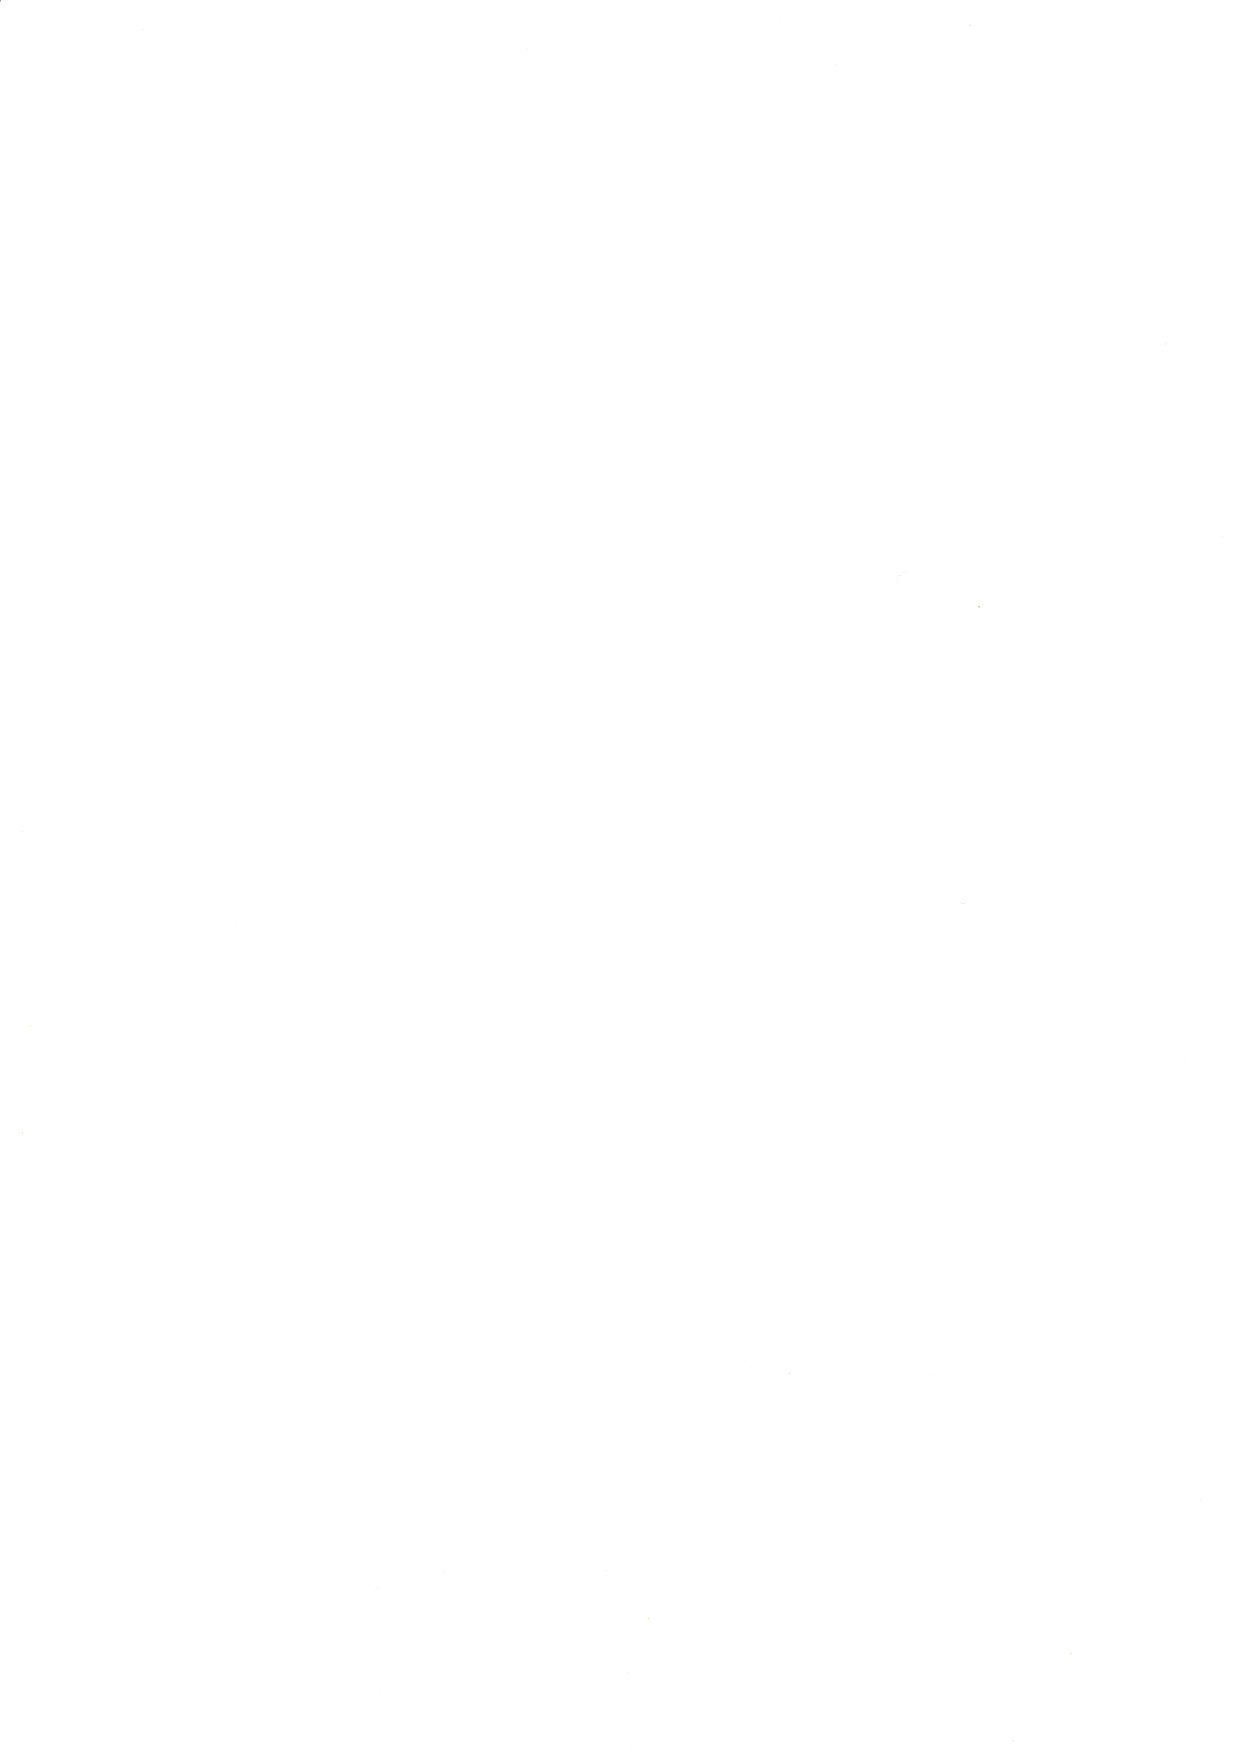

In [ ]:
Image.open(x_train[1])

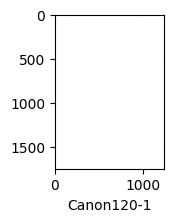

In [ ]:
import matplotlib.pyplot as plt

a = Image.open(x_train[1])
plt.figure(figsize=(3,2))
plt.imshow(a, cmap='gray')
plt.xlabel(y_train[1])
plt.show()


In [ ]:
np.array(a).shape

(1752, 1240, 3)

In [ ]:
print("size of y" ,len(y_train))
print("size of x",len(x_train))

size of y 23
size of x 23


In [ ]:
from PIL import Image, UnidentifiedImageError
import numpy as np

img = []

for path in x_train:
    # Skip hidden or system files
    if os.path.basename(path).startswith('._'):
        continue

    try:
        image = Image.open(path).convert('RGB')  # convert to RGB
        img.append(np.array(image))
    except UnidentifiedImageError:
        print(f"⚠️ Skipped unreadable file: {path}")
    except Exception as e:
        print(f"⚠️ Error with {path}: {e}")

print(f" Successfully loaded {len(img)} images out of {len(x_train)} paths.")



 Successfully loaded 22 images out of 23 paths.


In [ ]:
img[1]

array([[[139, 152, 153],
        [251, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[202, 212, 217],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[241, 249, 246],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
img[1].shape

(1752, 1240, 3)

In [ ]:

from PIL import Image
import numpy as np
import os

img = []
target_size = (256, 256)  # choose a consistent size for all images

for path in x_train:   # ✅ use your existing list of image paths
    if os.path.basename(path).startswith('._'):
        continue
    try:
        image = Image.open(path).convert('RGB')
        image = image.resize(target_size)
        img.append(np.array(image))
    except Exception as e:
        print(f"⚠️ Skipped {path}: {e}")

# Convert to NumPy array and normalize
x_train = np.array(img, dtype=np.float32) / 255.0
y_train = np.array(y_train)

print(" x_train shape:", x_train.shape)
print(" y_train shape:", y_train.shape)



 x_train shape: (22, 256, 256, 3)
 y_train shape: (23,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)#0,1,2,3,4,5,6

In [ ]:
# keep only matching pairs
min_len = min(len(x_train), len(y_train))
x_train = x_train[:min_len]
y_train = y_train[:min_len]

print(f" After trimming: {len(x_train)} images and {len(y_train)} labels.")



 After trimming: 22 images and 22 labels.


In [ ]:
from collections import Counter

# Make sure y_train and x_train are lists
y_train = list(y_train)
x_train = list(x_train)

# Duplicate rare classes
counts = Counter(y_train)
for label, count in counts.items():
    if count == 1:
        idx = y_train.index(label)
        x_train.append(x_train[idx])  # duplicate that single image
        y_train.append(label)

print(" Duplicated single-sample classes successfully.")



 Duplicated single-sample classes successfully.


In [ ]:
print("size of x test",len(x_test))
print("size of y test",len(y_test))

size of x test 0
size of y test 5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)



In [ ]:
x_test=np.array(img)
x_test=x_test/255
y_test=np.array(y_test)


In [ ]:

model=Sequential([
    #1st convo layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)),
    # 1st pooling layer
    MaxPool2D(pool_size=(2, 2)),
    # 2nd convo layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #2nd pooling layer
    MaxPool2D(pool_size=(2, 2)),
    #Dropout layer
    Dropout(0.2),
    #3rd convo layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    #3rd pooling layer
    MaxPool2D(pool_size=(2, 2)),
    #4th convo layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    #4th pooling layer
    MaxPool2D(pool_size=(2, 2)),
    # Dropout layer
    Dropout(0.2),
    # Flattens the input
    Flatten(),
    # Dense layer
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import os
import numpy as np
from PIL import Image

# your main folder path
train_dir = "/content/drive/MyDrive/Flatfield"

# store image paths and labels
x_train_paths = []
y_train = []

for label in os.listdir(train_dir):
    class_folder = os.path.join(train_dir, label)
    if os.path.isdir(class_folder):
        for file in os.listdir(class_folder):
            if file.endswith(('.tif', '.jpg', '.png')):
                if file.startswith("._"):  # skip hidden files
                    continue
                x_train_paths.append(os.path.join(class_folder, file))
                y_train.append(label)

print(" Found", len(x_train_paths), "images across", len(set(y_train)), "classes")




 Found 22 images across 11 classes


In [ ]:
images = []
target_size = (128, 128)

for path in x_train_paths:
    try:
        img = Image.open(path).convert('RGB').resize(target_size)
        images.append(np.array(img))
    except Exception as e:
        print(" Error loading:", path, "|", e)

x_train = np.array(images) / 255.0
print(" x_train shape:", x_train.shape)


 x_train shape: (22, 128, 128, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
print(" Encoded y_train shape:", y_train.shape)


 Encoded y_train shape: (22,)


In [ ]:
img = Image.open(path).convert('L').resize(target_size)  # 'L' = grayscale



In [ ]:
input_shape=(128, 128, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # 👈 CHANGED to 3 channels
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')  # output classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,739 (28.20 MB)

 Trainable params: 7,393,739 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=30)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1364 - loss: 2.4323
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 769ms/step - accuracy: 0.0455 - loss: 9.1545
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - accuracy: 0.0455 - loss: 5.7504
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step - accuracy: 0.0455 - loss: 4.1747
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step - accuracy: 0.0000e+00 - loss: 3.4494
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step - accuracy: 0.0909 - loss: 2.6538
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.1818 - loss: 2.4143
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step - accuracy: 0.0909 - loss: 2.3455
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.1364 - loss: 2.4438
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step - accuracy: 0.1818 - loss: 2.3621
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.0909 - loss: 2.4292
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step - accuracy: 0.0000e+00